In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt
from tensorflow.keras import initializers

2022-12-02 18:22:51.769849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Import data 

In [2]:
df_american = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_american_clean.xlsx')

In [3]:
df_american = df_american.set_index(['date'])

In [4]:
X = df_american[['revenue', 'seat_miles', 'load_factor', 'flights']]

In [5]:
y = df_american['pax_count'].values

## Train & test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## Normalize the data

In [7]:
scaler = MinMaxScaler()

In [8]:
X_train = scaler.fit_transform(X_train)

In [9]:
X_test = scaler.transform(X_test)

## Creating the model 

In [44]:
model = Sequential()

model.add(Dense(4, activation='relu', 
                #kernel_initializer=initializers.RandomNormal(stddev=0.01),
               # bias_initializer=initializers.Zeros()
               ))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(units=1,activation='relu'))

In [45]:
opt = keras.optimizers.Adam(learning_rate=0.2)

model.compile(loss = 'mean_absolute_error', optimizer= opt)

## Fit the model 

In [47]:
model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 1s 51ms/step - loss: 8841776.0000 - val_loss: 8679733.0000
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 8841160.0000 - val_loss: 8677078.0000
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 8834848.0000 - val_loss: 8657540.0000
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 8796240.0000 - val_loss: 8562100.0000
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 8632499.0000 - val_loss: 8208567.5000
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 8067343.5000 - val_loss: 7133660.0000
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 6467232.5000 - val_loss: 4332060.5000
Epoch 8/100
6/6 [==============================] - 0s 16ms/step - loss: 2612308.5000 - val_loss: 1560608.7500
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 1740255.6250 - val_loss: 465440.1875
Epoch 10/10

In [48]:
losses = pd.DataFrame(model.history.history)

In [49]:
losses

,loss,val_loss
0,8.841776e+06,8.679733e+06
1,8.841160e+06,8.677078e+06
2,8.834848e+06,8.657540e+06
3,8.796240e+06,8.562100e+06
4,8.632499e+06,8.208568e+06
...,...,...
95,2.606655e+05,2.473162e+05
96,2.143181e+05,2.239661e+05
97,2.400574e+05,3.054568e+05
98,2.337930e+05,2.697907e+05


<AxesSubplot:>

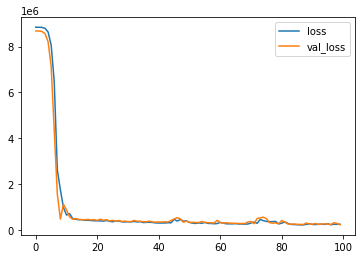

In [50]:
losses.plot()

In [51]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [52]:
model.summary()
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()) # weights
    print("  --Biases: ", layer.get_weights()) # biases
    

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 8)                 40        
                                                                 
 dense_17 (Dense)            (None, 5)                 45        
                                                                 
 dense_18 (Dense)            (None, 3)                 18        
                                                                 
 dense_19 (Dense)            (None, 1)                 4         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Layer:  dense_15
  --Kernels (Weights):  [array([[-0.796

In [53]:
testScore = math.sqrt(mean_squared_error(y_test, testPredict))
print("Test Score: %.2f RMSE" % (testScore))

Test Score: 279770.94 RMSE


In [54]:
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict))
print("Train Score: %.2f RMSE" % (testScore))

Train Score: 279770.94 RMSE


In [55]:
def plot_american(actual, predictions):
    title = 'Passanger Predictions Store '
    act = plt.plot(actual, color='blue', label='Actual')
    pred = plt.plot(predictions, color='orange', label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Paxe")
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

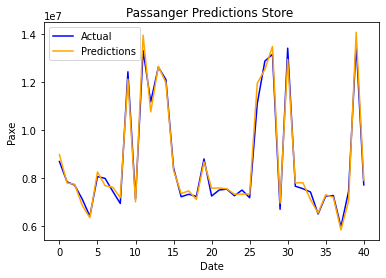

In [56]:
plot_american(y_test, testPredict)

In [58]:
print(len(y_test))

41
